In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import cv2
import glob as gb
import tensorflow as tf
from keras import layers, models
from keras.datasets import cifar10
from keras.applications import ResNet152V2, VGG16, VGG19, InceptionV3, EfficientNetB7
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.models import Model, Sequential, load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, recall_score, precision_score, f1_score,roc_curve,auc
from sklearn.preprocessing import label_binarize, LabelEncoder
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from PIL import Image
import keras.backend as K

In [2]:
import sys
import os

code_folder = r'D:/Corrosion detection/Corrosion Detection/Code'
sys.path.append(code_folder)

from ImageProcessor import ImageReader, ImageLoading,ImageAugmentation
from Model import ModelTrainer,ModelArchitectures 
from ModelEvaluator import ModelEvaluator

In [3]:
test_1st_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Testing/1st'
pred_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Pred'
test_2nd_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Testing/2nd'
augmented_train_1st_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Augmented_Training/1st'
augmented_train_2nd_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Augmented_Training/2nd'

In [4]:
train_1st_code = {0: "No Corrosion Pipeline", 1: "Pitting", 2: "Uniform Corrosion" }
train_2nd_code = {'Crevice Corrosion':0 ,'No Corrosion Flanges':1 }

In [5]:
image_loader = ImageLoading()

In [6]:
x_train_1st, y_train_1st = image_loader.load_images(augmented_train_1st_path, code=train_1st_code, is_subfolder=True)
x_train_2nd, y_train_2nd = image_loader.load_images(augmented_train_2nd_path, code=train_2nd_code, is_subfolder=True)
x_test_1st, y_test_1st = image_loader.load_images(test_1st_path, code=train_1st_code, is_subfolder=True)
x_test_2nd, y_test_2nd = image_loader.load_images(test_2nd_path, code=train_2nd_code, is_subfolder=True)

In [7]:
# Shuffle the first test dataset
x_test_1st_shuffled, y_test_1st_shuffled = image_loader.shuffle_data(x_test_1st, y_test_1st)

# Shuffle the second test dataset
x_test_2nd_shuffled, y_test_2nd_shuffled = image_loader.shuffle_data(x_test_2nd, y_test_2nd)


In [8]:
class_1st_labels = np.unique(y_train_1st)
class_2nd_labels = np.unique(y_train_2nd)

In [9]:
model_1st_checkpoint ='D:/Corrosion detection/Corrosion Detection/models/1st'
model_2nd_checkpoint ='D:/Corrosion detection/Corrosion Detection/models/2nd'

In [10]:
model_arch = ModelArchitectures(input_shape=(224, 224, 3), weights='imagenet')

models_dict = {
    'ResNet152V2': model_arch.resnet152v2,
    'InceptionV3': model_arch.inception_v3,
}

In [11]:
ResNet_dict = {
    'ResNet152V2': model_arch.resnet152v2,
}

In [12]:
model_1st_trainer = ModelTrainer(
    models=models_dict,
    class_labels=class_1st_labels,
    train_data=(x_train_1st, y_train_1st),
    val_data=(x_train_1st, y_train_1st), 
    test_data=(x_test_1st, y_test_1st), 
    epochs=5,  # Set the number of epochs
    batch_size=32,  # Set the batch size to 8
    checkpoint_path="model_1st_checkpoint.keras"
)

In [ ]:
model_2nd_trainer = ModelTrainer(
    models=models_dict,
    class_labels=class_2nd_labels,
    train_data=(x_train_2nd, y_train_2nd),
    val_data=(x_test_2nd, y_test_2nd), 
    test_data=(x_test_2nd, y_test_2nd), 
    epochs=5,  
    batch_size=32, 
    checkpoint_path="model_2nd_checkpoint.keras"
)

Training ResNet152V2...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7798 - loss: 0.6467
Epoch 1: val_accuracy improved from -inf to 0.93000, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 505s 10s/step - accuracy: 0.7812 - loss: 0.6428 - val_accuracy: 0.9300 - val_loss: 0.1588 - learning_rate: 0.0010
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9449 - loss: 0.1329
Epoch 2: val_accuracy improved from 0.93000 to 0.98067, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 442s 9s/step - accuracy: 0.9449 - loss: 0.1330 - val_accuracy: 0.9807 - val_loss: 0.0586 - learning_rate: 0.0010
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9649 - loss: 0.0843
Epoch 3: val_accuracy improved from 0.98067 to 0.99067, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 444s 10s/step - accuracy: 0.9649 - loss: 0.0844 - val_accuracy: 0.9907 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 4/5
47/4

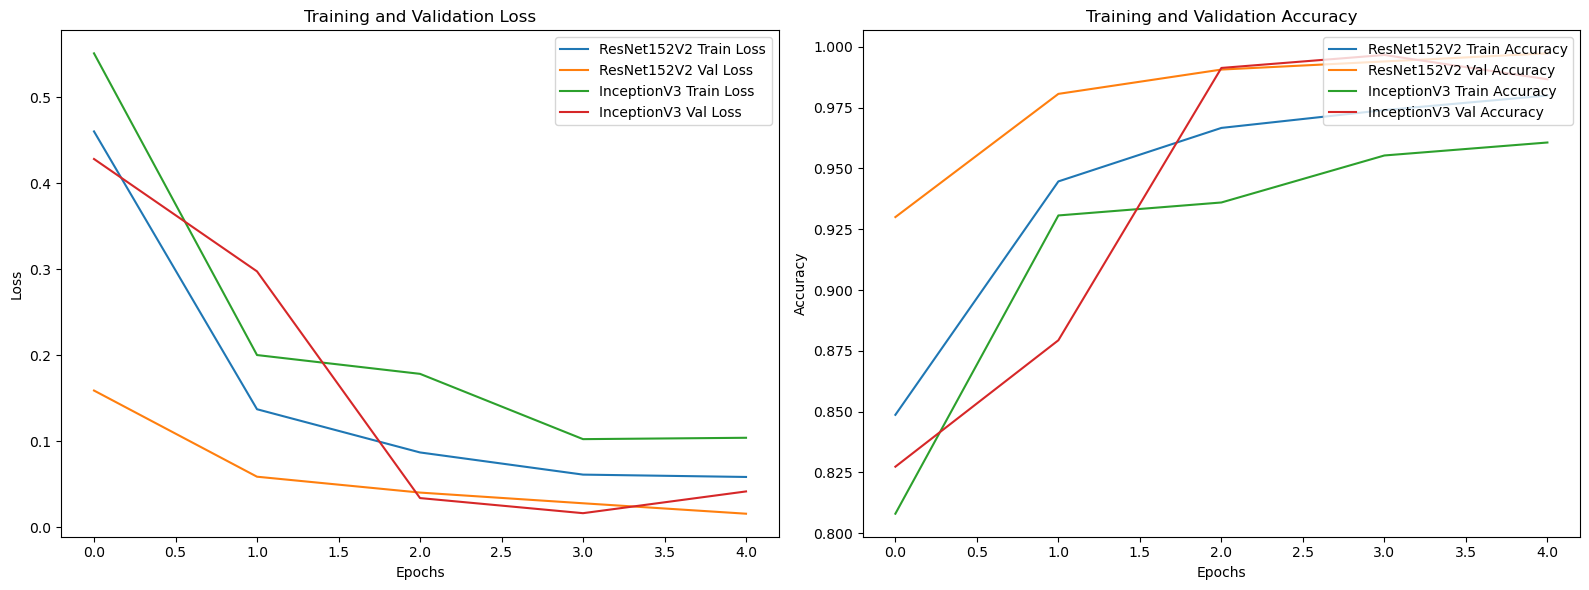

In [ ]:
model_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7153 - loss: 0.6888
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.7176 - loss: 0.6848 - val_accuracy: 0.8000 - val_loss: 0.5694 - learning_rate: 0.0010
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9200 - loss: 0.2052
Epoch 2: val_accuracy did not improve from 0.80000
32/32 ━━━━━━━━━━━━━━━━━━━━ 157s 5s/step - accuracy: 0.9201 - loss: 0.2049 - val_accuracy: 0.8000 - val_loss: 0.4724 - learning_rate: 0.0010
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9657 - loss: 0.0991
Epoch 3: val_accuracy improved from 0.80000 to 0.90000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 157s 5s/step - accuracy: 0.9654 - loss: 0.1001 - val_accuracy: 0.9000 - val_loss: 0.3231 - learning_rate: 0.0010
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.96

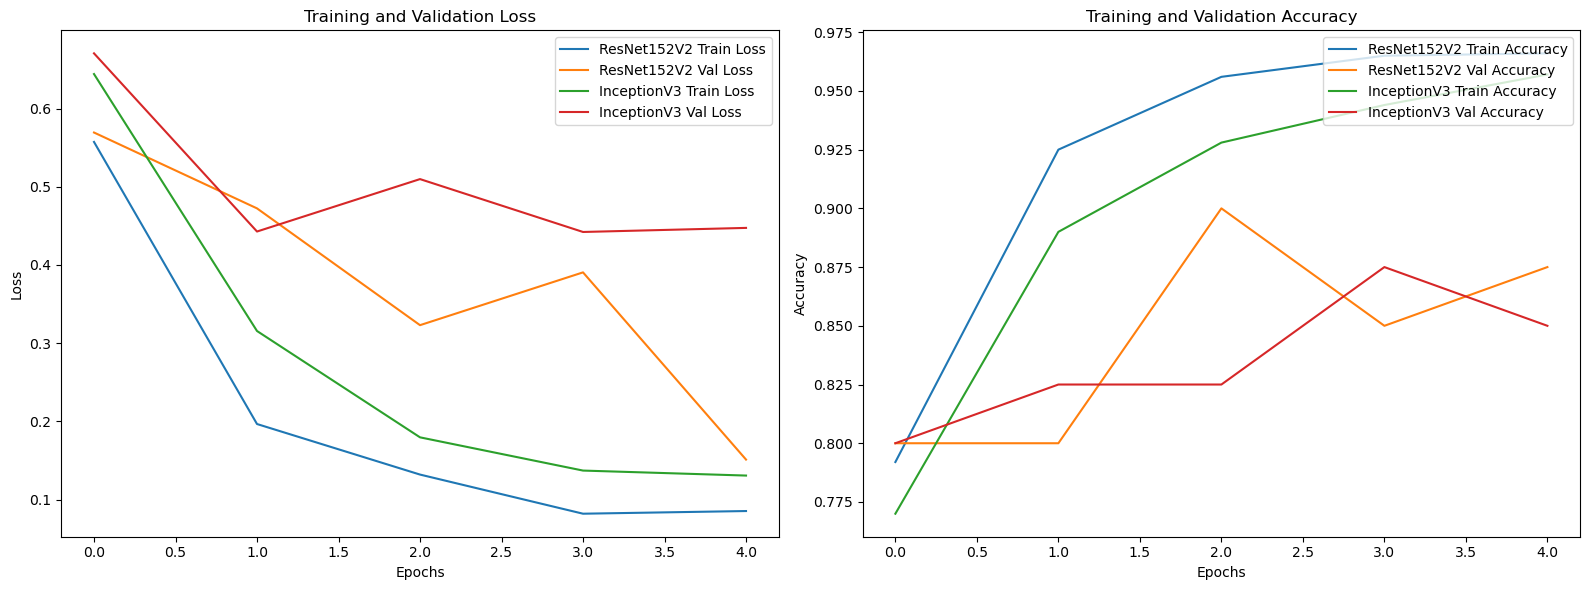

In [ ]:
model_2nd_trainer.train_and_evaluate_all_models()

In [ ]:
ResNet_1st_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_1st_labels,
    train_data=(x_train_1st, y_train_1st),
    val_data=(x_train_1st, y_train_1st), 
    test_data=(x_test_1st, y_test_1st), 
    epochs=10,  # Set the number of epochs
    validation_batch_size=5,
    batch_size=32,  # Set the batch size to 8
    checkpoint_path="model_1st_checkpoint.keras"
)

In [ ]:
ResNet_2nd_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_2nd_labels,
    train_data=(x_train_2nd, y_train_2nd),
    val_data=(x_test_2nd, y_test_2nd), 
    test_data=(x_test_2nd, y_test_2nd), 
    epochs=10,  
    validation_batch_size=5,
    batch_size=32, 
    checkpoint_path="model_2nd_checkpoint.keras"
)

Training ResNet152V2...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7046 - loss: 6.5697
Epoch 1: val_accuracy improved from -inf to 0.95067, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 499s 10s/step - accuracy: 0.7063 - loss: 6.5473 - val_accuracy: 0.9507 - val_loss: 3.4820 - learning_rate: 0.0010
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9187 - loss: 2.9978
Epoch 2: val_accuracy improved from 0.95067 to 0.97533, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 447s 10s/step - accuracy: 0.9188 - loss: 2.9881 - val_accuracy: 0.9753 - val_loss: 1.6591 - learning_rate: 0.0010
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9403 - loss: 1.4822
Epoch 3: val_accuracy improved from 0.97533 to 0.98267, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 449s 10s/step - accuracy: 0.9402 - loss: 1.4789 - val_accuracy: 0.9827 - val_loss: 0.8771 - learning_rate: 0.0010
Epoch 4/5
47/

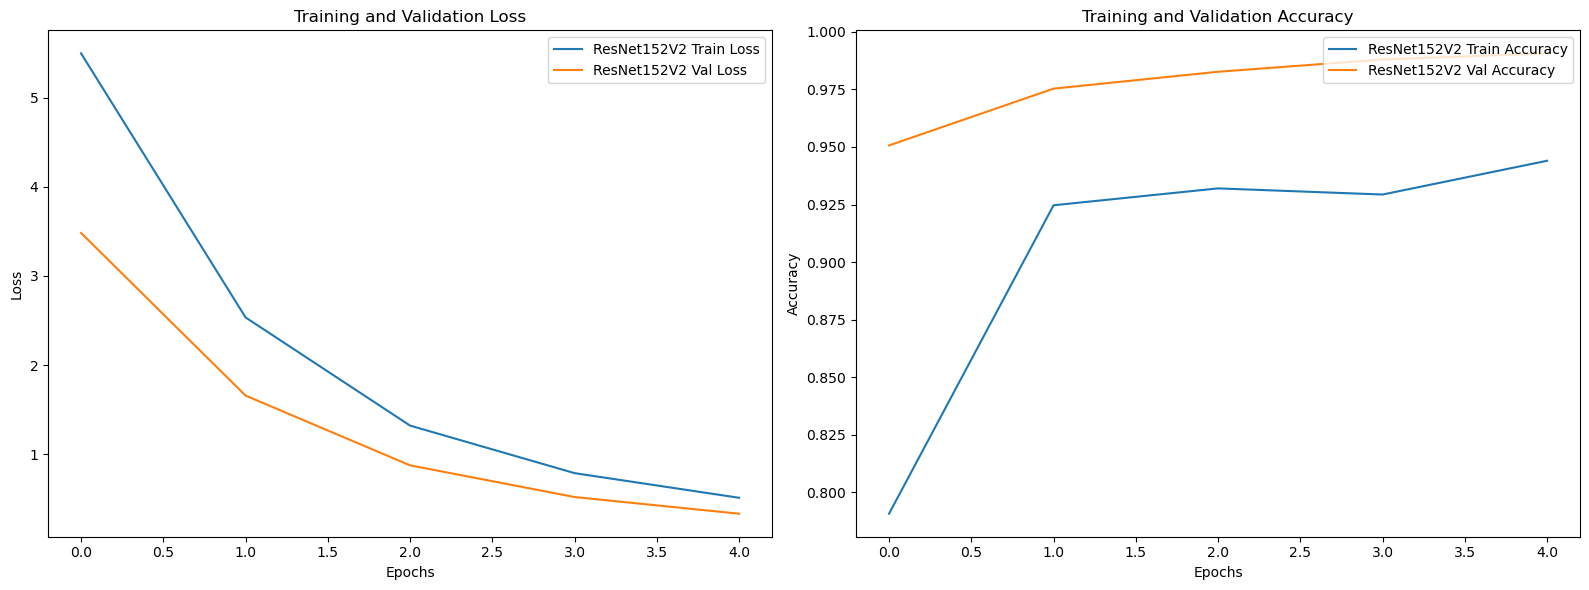

In [ ]:
#without l2 5 epochs
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6236 - loss: 7.3584
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.6262 - loss: 7.3293 - val_accuracy: 0.7500 - val_loss: 4.7477 - learning_rate: 0.0010
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8566 - loss: 4.1292
Epoch 2: val_accuracy improved from 0.75000 to 0.85000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step - accuracy: 0.8573 - loss: 4.1154 - val_accuracy: 0.8500 - val_loss: 2.8229 - learning_rate: 0.0010
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9025 - loss: 2.5198
Epoch 3: val_accuracy did not improve from 0.85000
32/32 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.9025 - loss: 2.5130 - val_accuracy: 0.8500 - val_loss: 1.9219 - learning_rate: 0.0010
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.95

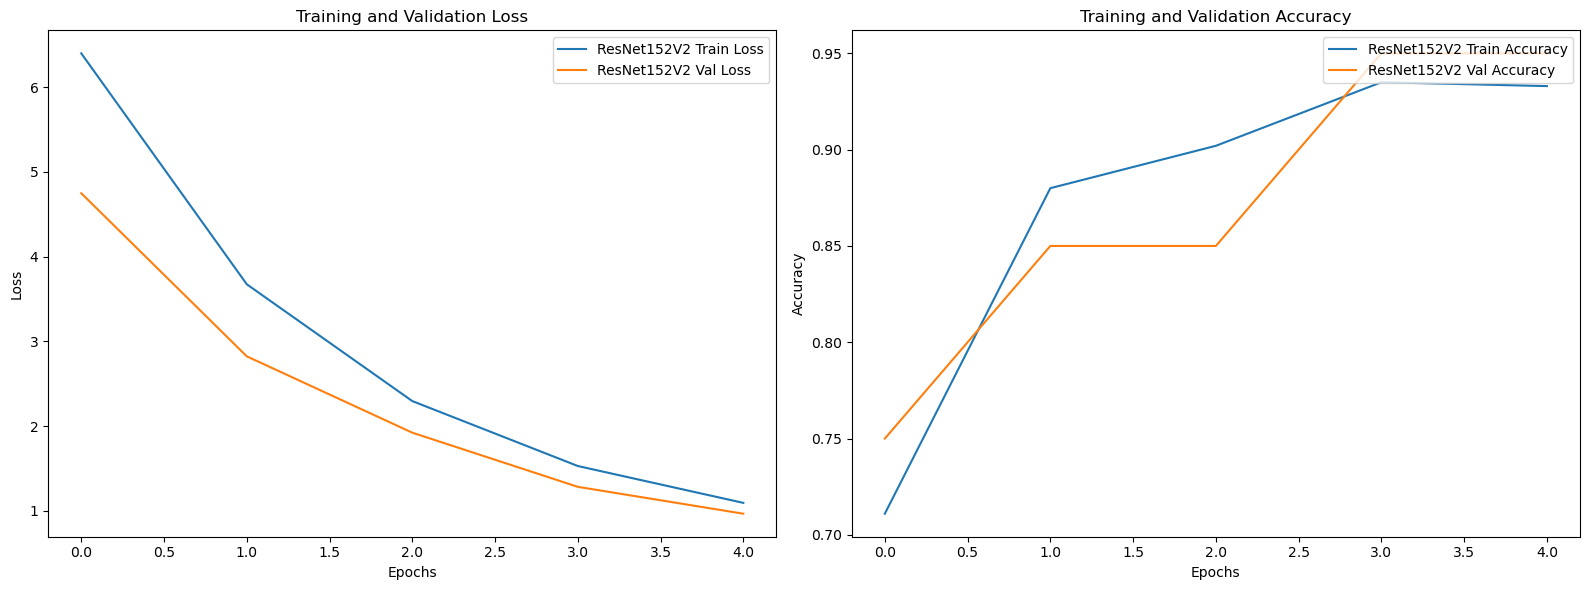

In [ ]:
#best model 2nd
#without l2 5 epochs
ResNet_2nd_trainer.train_and_evaluate_all_models()

Training ResNet152V2...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6629 - loss: 7.0886
Epoch 1: val_accuracy improved from -inf to 0.85733, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 493s 10s/step - accuracy: 0.6651 - loss: 7.0655 - val_accuracy: 0.8573 - val_loss: 4.1169 - learning_rate: 0.0010
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9087 - loss: 3.5032
Epoch 2: val_accuracy improved from 0.85733 to 0.97600, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 449s 10s/step - accuracy: 0.9088 - loss: 3.4929 - val_accuracy: 0.9760 - val_loss: 2.0386 - learning_rate: 0.0010
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9303 - loss: 1.8469
Epoch 3: val_accuracy improved from 0.97600 to 0.98267, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 450s 10s/step - accuracy: 0.9302 - loss: 1.8422 - val_accuracy: 0.9827 - val_loss: 1.1039 - learning_rate: 0.0010
Epoch 4/5
47/

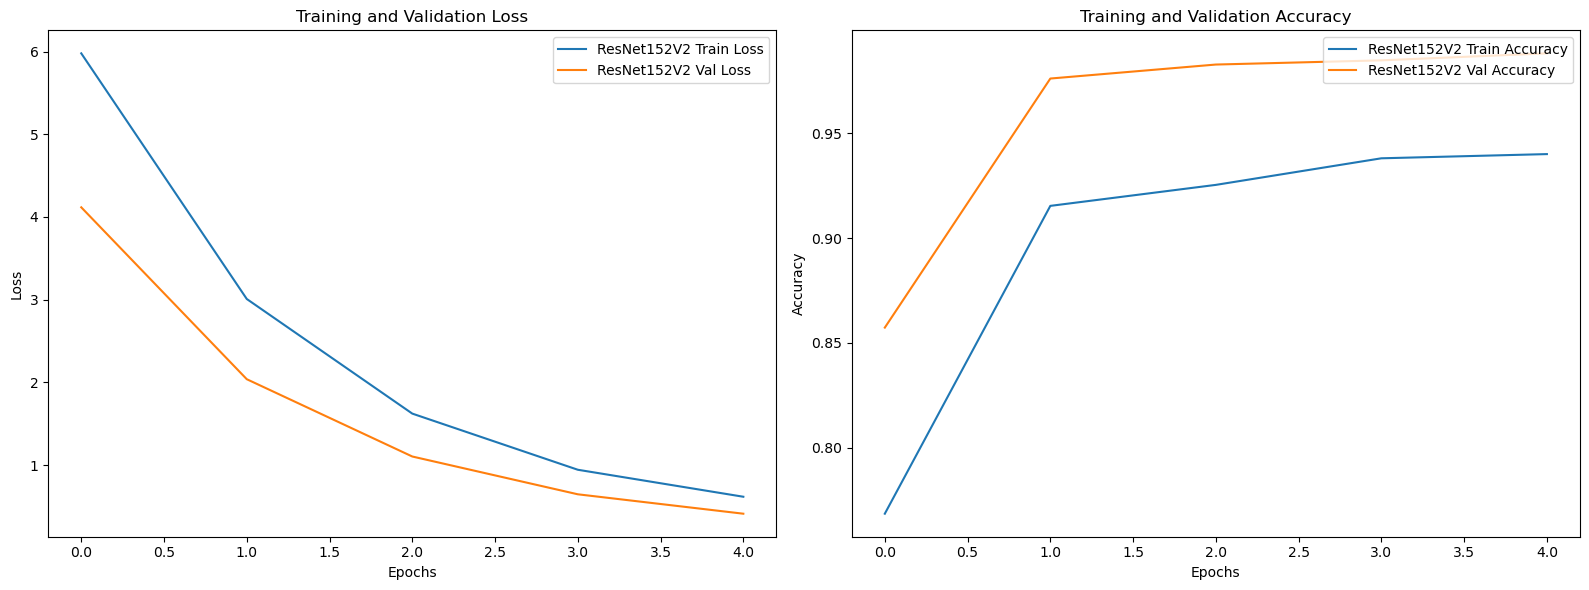

In [ ]:
#with l2 5 epochs
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6415 - loss: 6.9683
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.6439 - loss: 6.9432 - val_accuracy: 0.8000 - val_loss: 4.5445 - learning_rate: 0.0010
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8620 - loss: 3.9660
Epoch 2: val_accuracy improved from 0.80000 to 0.82500, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.8624 - loss: 3.9529 - val_accuracy: 0.8250 - val_loss: 2.7768 - learning_rate: 0.0010
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9153 - loss: 2.3715
Epoch 3: val_accuracy improved from 0.82500 to 0.85000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.9150 - loss: 2.3654 - val_accuracy: 0.8500 - val_loss: 1.7937 - learning_rate: 0.0010
Epoch 4/5
32/32 

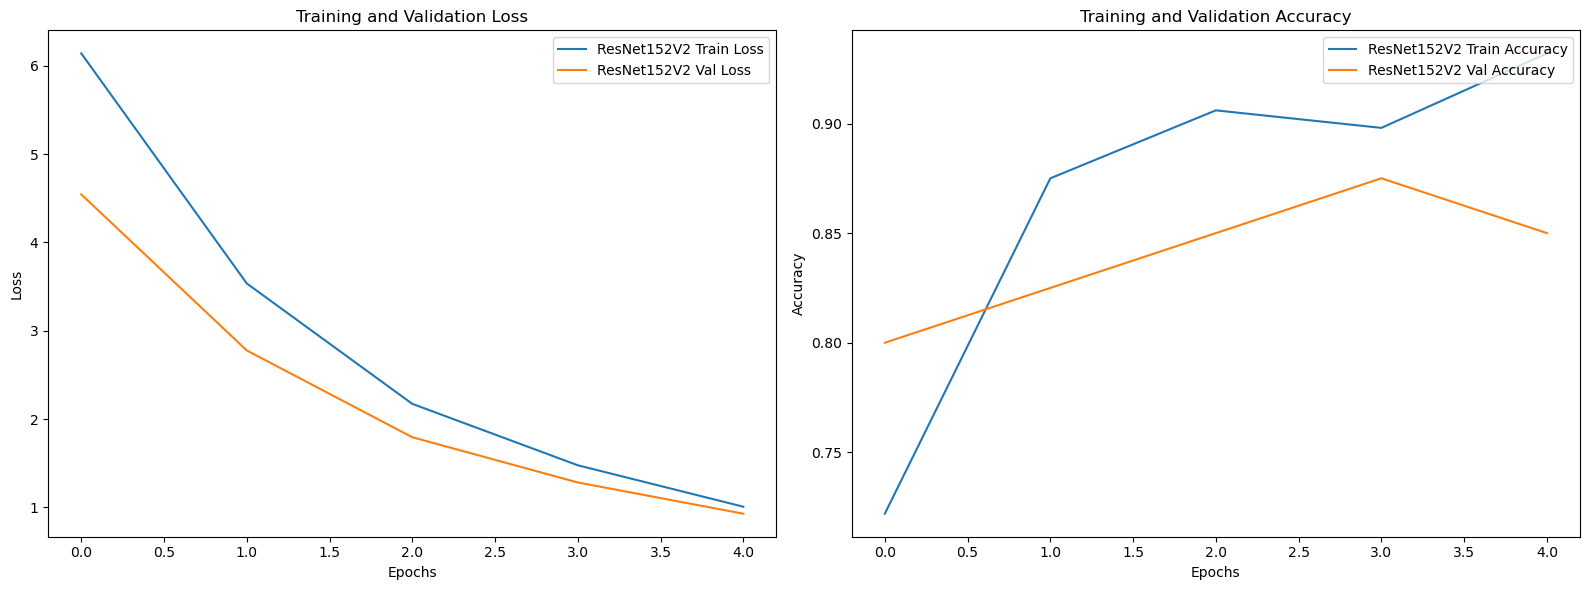

In [ ]:
#with l2 5 epochs
ResNet_2nd_trainer.train_and_evaluate_all_models()

Training ResNet152V2...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7325 - loss: 6.4726
Epoch 1: val_accuracy improved from -inf to 0.90667, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 495s 10s/step - accuracy: 0.7340 - loss: 6.4507 - val_accuracy: 0.9067 - val_loss: 3.4268 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8883 - loss: 2.9822
Epoch 2: val_accuracy improved from 0.90667 to 0.95600, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 448s 10s/step - accuracy: 0.8885 - loss: 2.9731 - val_accuracy: 0.9560 - val_loss: 1.6767 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9332 - loss: 1.5225
Epoch 3: val_accuracy improved from 0.95600 to 0.97000, sa

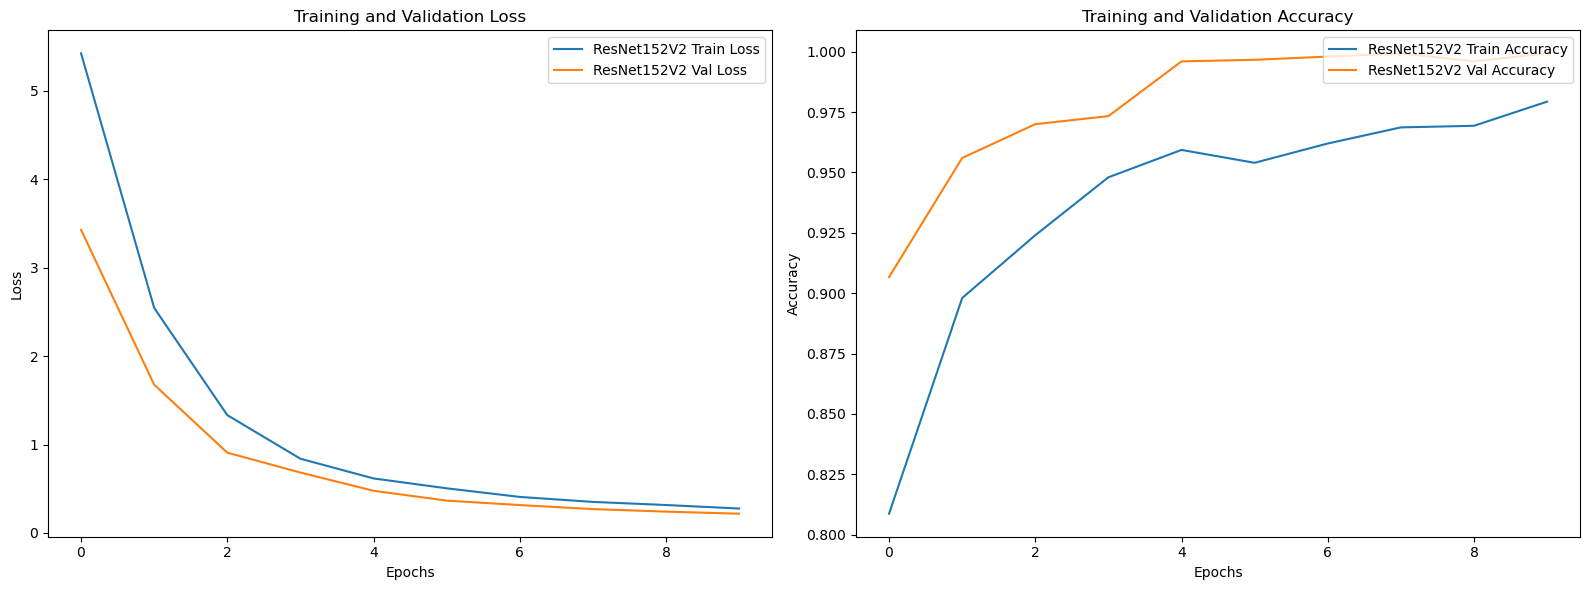

In [ ]:
# with l2 / 10 epochs / learning rate scheduler
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6439 - loss: 1.6978
Epoch 1: val_accuracy improved from -inf to 0.84000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.6459 - loss: 1.6888 - val_accuracy: 0.8400 - val_loss: 0.9489 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9010 - loss: 0.8675
Epoch 2: val_accuracy did not improve from 0.84000
32/32 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.9006 - loss: 0.8672 - val_accuracy: 0.8200 - val_loss: 0.9572 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9248 - loss: 0.7196
Epoch 3: val_accuracy improved from 0.84000 to 0.90000, saving model to model_2nd_checkpoint.keras
32/32 ━━━

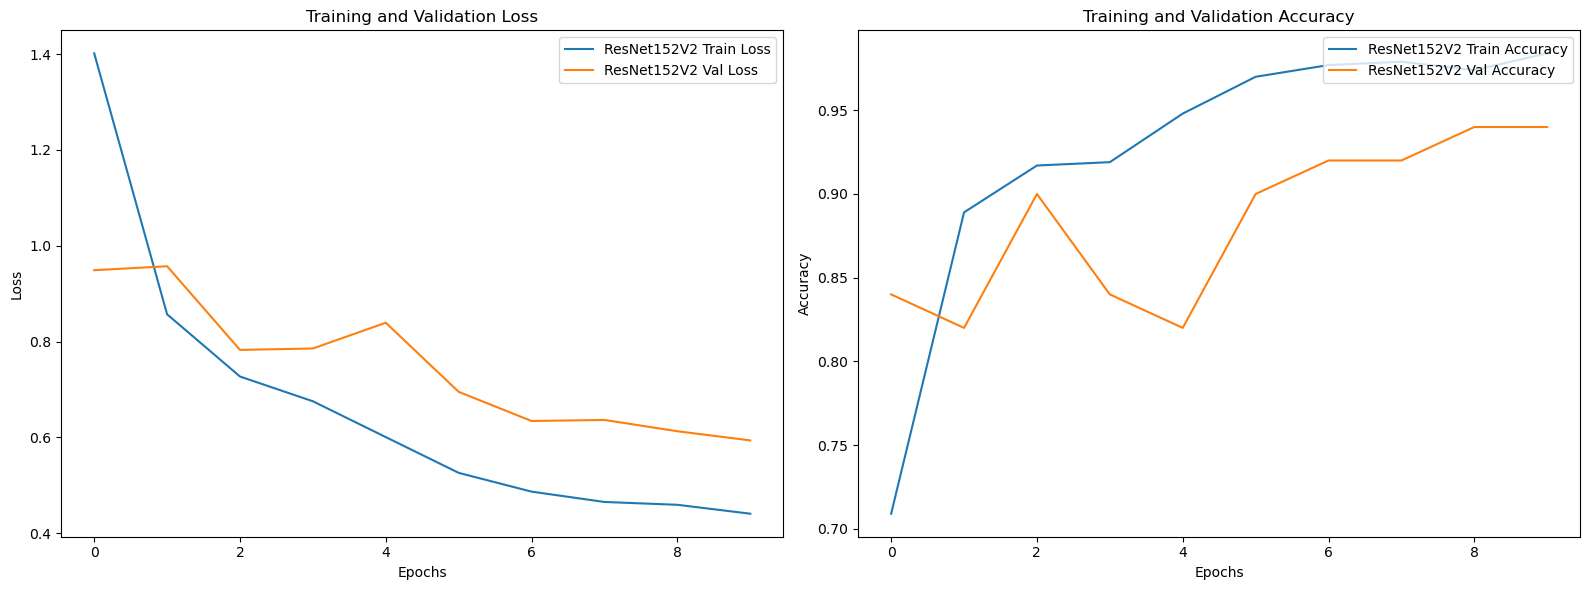

In [ ]:
#without l2 / 10 epochs / learning rate scheduler
ResNet_2nd_trainer.train_and_evaluate_all_models()

In [12]:
ResNet_1st_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_1st_labels,
    train_data=(x_train_1st, y_train_1st),
    val_data=(x_test_1st_shuffled, y_test_1st_shuffled), 
    test_data=(x_test_1st, y_test_1st), 
    epochs=8,  # Set the number of epochs
    batch_size=32,  # Set the batch size to 8
    checkpoint_path="model_1st_checkpoint.keras"
)

In [15]:
ResNet_2nd_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_2nd_labels,
    train_data=(x_train_2nd, y_train_2nd),
    val_data=(x_test_2nd_shuffled, y_test_2nd_shuffled), 
    test_data=(x_test_2nd, y_test_2nd), 
    epochs=8,  
    batch_size=32, 
    checkpoint_path="model_2nd_checkpoint.keras"
)

Training ResNet152V2...
Epoch 1/8
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7406 - loss: 6.5359
Epoch 1: val_accuracy improved from -inf to 0.86667, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.7421 - loss: 6.5142 - val_accuracy: 0.8667 - val_loss: 3.6301 - learning_rate: 0.0010
Epoch 2/8
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8863 - loss: 3.0515
Epoch 2: val_accuracy improved from 0.86667 to 0.95556, saving model to model_1st_checkpoint.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.8868 - loss: 3.0415 - val_accuracy: 0.9556 - val_loss: 1.7582 - learning_rate: 0.0010
Epoch 3/8
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9236 - loss: 1.5595
Epoch 3: val_accuracy did not improve from 0.95556
47/47 ━━━━━━━━━━━━━━━━━━━━ 238s 5s/step - accuracy: 0.9237 - loss: 1.5554 - val_accuracy: 0.9000 - val_loss: 1.0405 - learning_rate: 0.0010
Epoch 4/8
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.93

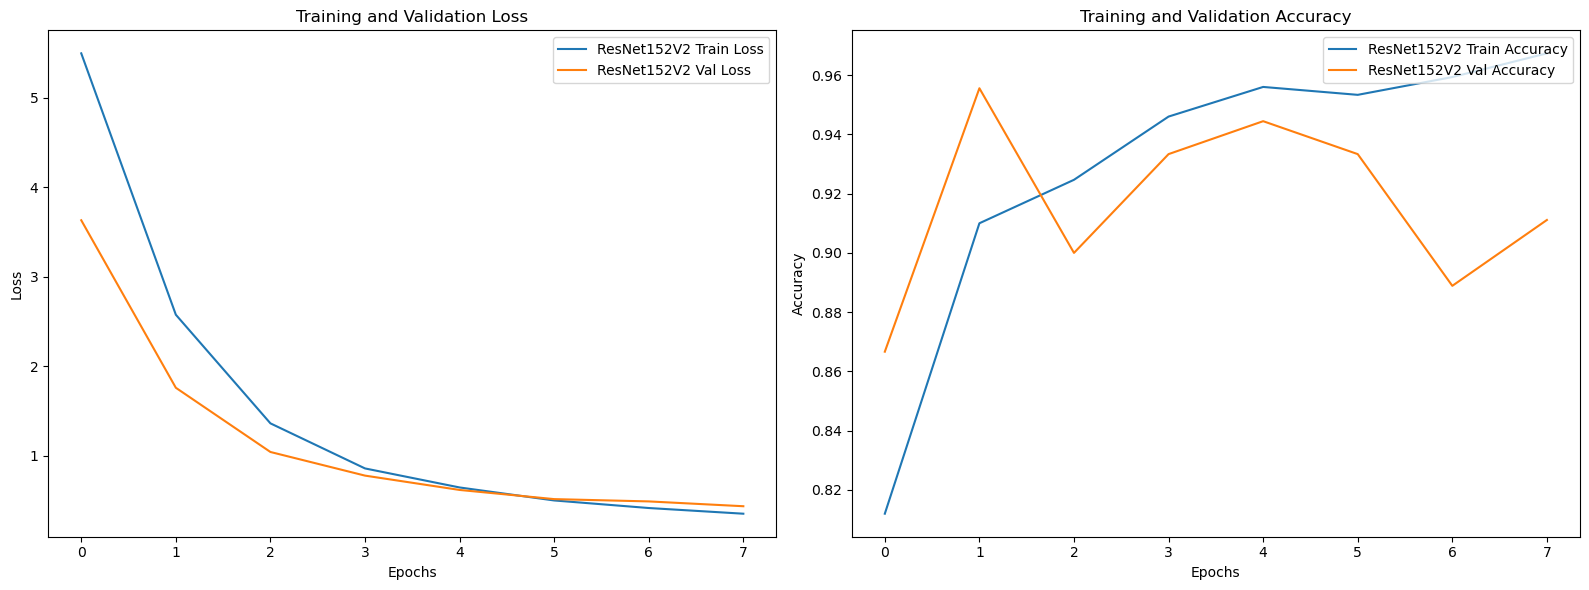

In [13]:
#Best model 1st
#l2 regulizer & learning rate reducer after 3 epochs
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...
Epoch 1/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6482 - loss: 6.9527
Epoch 1: val_accuracy improved from -inf to 0.82000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.6505 - loss: 6.9272 - val_accuracy: 0.8200 - val_loss: 4.4656 - learning_rate: 0.0010
Epoch 2/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8769 - loss: 3.9018
Epoch 2: val_accuracy did not improve from 0.82000
32/32 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.8767 - loss: 3.8895 - val_accuracy: 0.7600 - val_loss: 2.8525 - learning_rate: 0.0010
Epoch 3/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9038 - loss: 2.3766
Epoch 3: val_accuracy improved from 0.82000 to 0.90000, saving model to model_2nd_checkpoint.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 0.9039 - loss: 2.3704 - val_accuracy: 0.9000 - val_loss: 1.8286 - learning_rate: 0.0010
Epoch 4/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.92

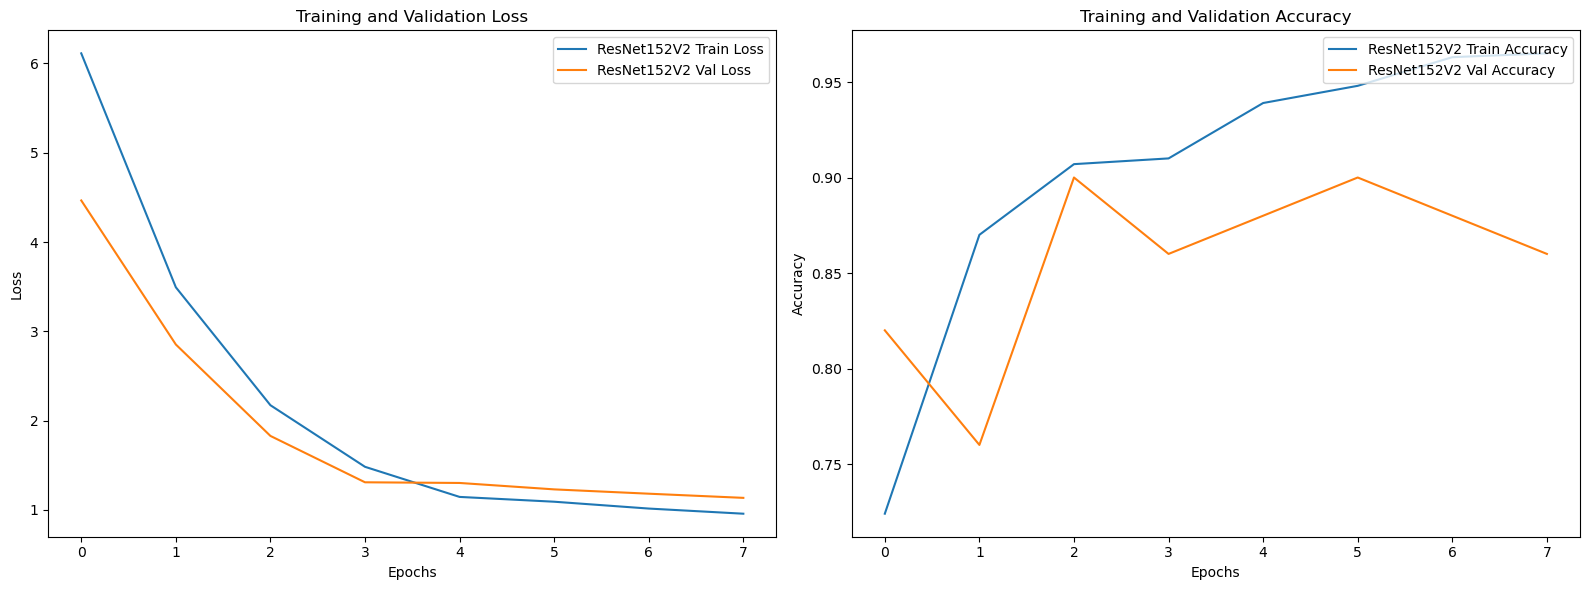

In [16]:
ResNet_2nd_trainer.train_and_evaluate_all_models()

In [13]:
ResNet_1st_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_1st_labels,
    train_data=(x_train_1st, y_train_1st),
    val_data=(x_test_1st_shuffled, y_test_1st_shuffled), 
    test_data=(x_test_1st, y_test_1st), 
    epochs=6,  # Set the number of epochs
    batch_size=32,  # Set the batch size to 8
    checkpoint_path="model_1st_checkpoint.keras"
)

Training ResNet152V2...



Epoch 1/6


47/47 [==============================] - ETA: 0s - loss: 5.5310 - accuracy: 0.8193
Epoch 1: val_accuracy improved from -inf to 0.93333, saving model to model_1st_checkpoint.keras
47/47 [==============================] - 213s 4s/step - loss: 5.5310 - accuracy: 0.8193 - val_loss: 3.7001 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 2/6
47/47 [==============================] - ETA: 0s - loss: 2.7221 - accuracy: 0.9047
Epoch 2: val_accuracy did not improve from 0.93333
47/47 [==============================] - 187s 4s/step - loss: 2.7221 - accuracy: 0.9047 - val_loss: 1.9340 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 3/6
47/47 [==============================] - ETA: 0s - loss: 1.6108 - accuracy: 0.9380
Epoch 3: val_accuracy did not improve from 0.93333
47/47 [==============================] - 191s 4s/step - loss: 1.6108 - accuracy: 0.9380 - val_loss: 1.3994 - val_accuracy: 0.9111 - lr: 5.0000e-04
Epoch 4/6
47/47 [==============================] - ETA: 0s - 

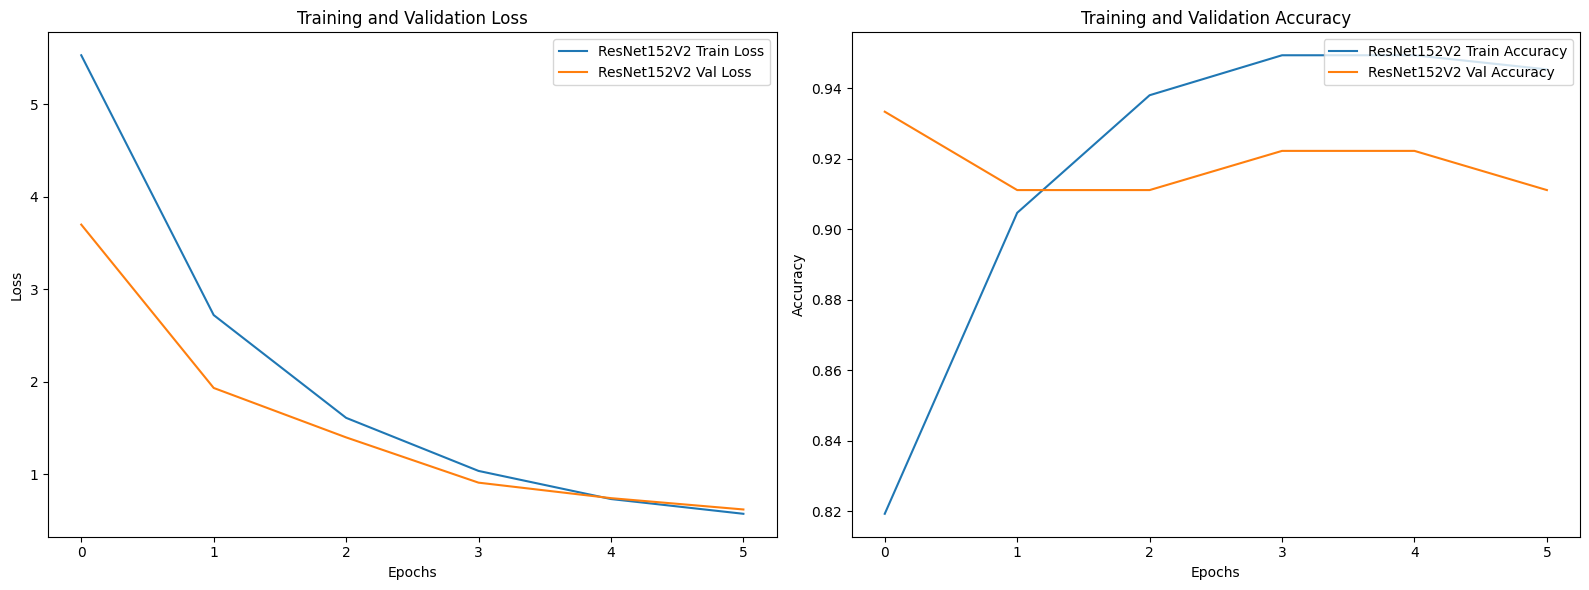

In [14]:
#Best model 1st
#l2 regulizer & learning rate reducer after 2 epochs
ResNet_1st_trainer.train_and_evaluate_all_models()

In [13]:
ResNet_1st_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_1st_labels,
    train_data=(x_train_1st, y_train_1st),
    val_data=(x_test_1st_shuffled, y_test_1st_shuffled), 
    test_data=(x_test_1st, y_test_1st), 
    epochs=5,  # Set the number of epochs
    batch_size=32,  # Set the batch size to 8
    checkpoint_path="model_1st_checkpoint.h5"
)

Training ResNet152V2...



Epoch 1/5


47/47 [==============================] - ETA: 0s - loss: 5.7900 - accuracy: 0.8007
Epoch 1: val_accuracy improved from -inf to 0.92222, saving model to model_1st_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 203s 4s/step - loss: 5.7900 - accuracy: 0.8007 - val_loss: 4.0613 - val_accuracy: 0.9222 - lr: 9.0000e-04
Epoch 2/5
47/47 [==============================] - ETA: 0s - loss: 3.3104 - accuracy: 0.9027
Epoch 2: val_accuracy improved from 0.92222 to 0.93333, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 186s 4s/step - loss: 3.3104 - accuracy: 0.9027 - val_loss: 2.5733 - val_accuracy: 0.9333 - lr: 6.0300e-04
Epoch 3/5
47/47 [==============================] - ETA: 0s - loss: 2.2546 - accuracy: 0.9453
Epoch 3: val_accuracy did not improve from 0.93333
47/47 [==============================] - 191s 4s/step - loss: 2.2546 - accuracy: 0.9453 - val_loss: 1.9612 - val_accuracy: 0.9333 - lr: 4.0401e-04
Epoch 4/5
47/47 [==============================] - ETA: 0s - loss: 1.7800 - accuracy: 0.9367
Epoch 4: val_accuracy did not improve from 0.93333
47/47 [==============================] - 208s 4s/step - loss: 1.7800 - accuracy: 0

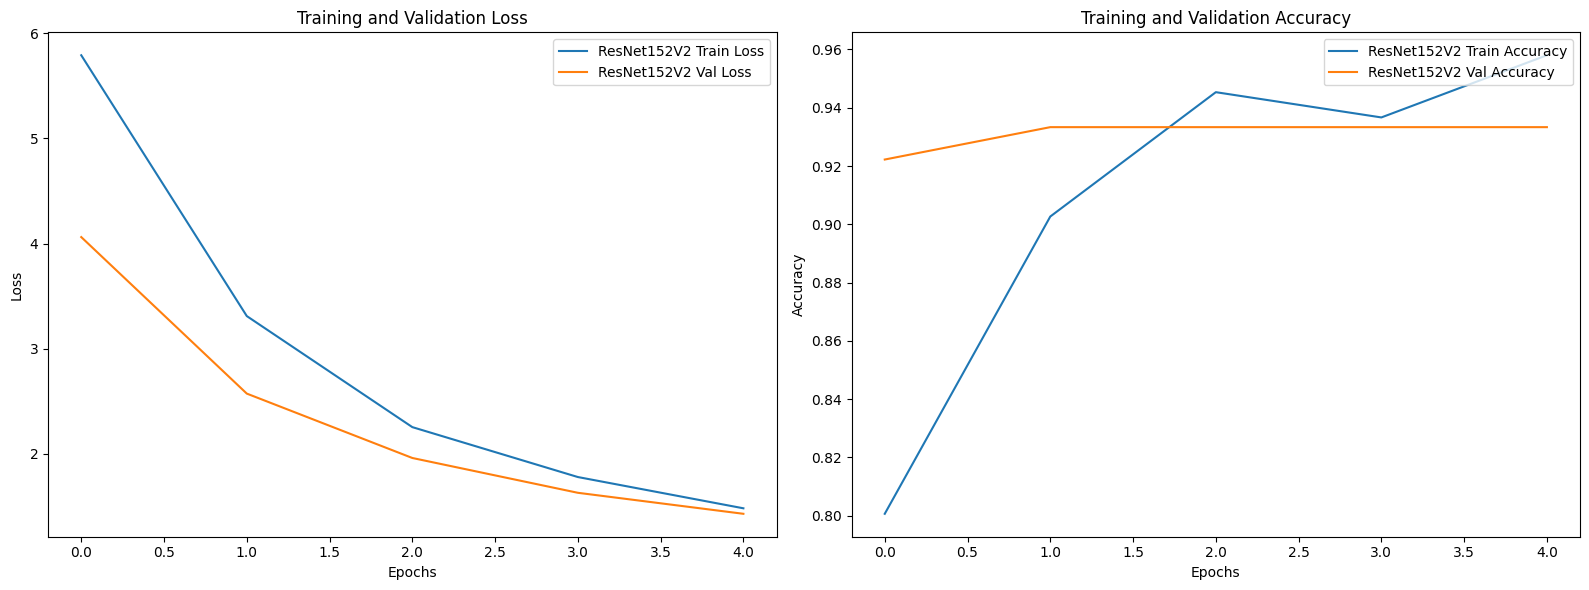

In [14]:
#Best model 1st
#l2 regulizer & learning rate reducer after 2 epochs
ResNet_1st_trainer.train_and_evaluate_all_models()

In [12]:
ResNet_1st_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_1st_labels,
    train_data=(x_train_1st, y_train_1st),
    val_data=(x_test_1st_shuffled, y_test_1st_shuffled), 
    test_data=(x_test_1st, y_test_1st), 
    epochs=20,  # Set the number of epochs
    batch_size=32,  # Set the batch size to 8
    checkpoint_path="model_1st_checkpoint.h5"
)

Training ResNet152V2...



Epoch 1/5


47/47 [==============================] - ETA: 0s - loss: 4.8083 - accuracy: 0.6367
Epoch 1: val_accuracy improved from -inf to 0.74444, saving model to model_1st_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 241s 5s/step - loss: 4.8083 - accuracy: 0.6367 - val_loss: 4.5739 - val_accuracy: 0.7444 - lr: 8.0000e-05
Epoch 2/5
47/47 [==============================] - ETA: 0s - loss: 4.3090 - accuracy: 0.8273
Epoch 2: val_accuracy improved from 0.74444 to 0.83333, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 201s 4s/step - loss: 4.3090 - accuracy: 0.8273 - val_loss: 4.2968 - val_accuracy: 0.8333 - lr: 8.0000e-05
Epoch 3/5
47/47 [==============================] - ETA: 0s - loss: 4.0658 - accuracy: 0.8713
Epoch 3: val_accuracy improved from 0.83333 to 0.88889, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 202s 4s/step - loss: 4.0658 - accuracy: 0.8713 - val_loss: 4.0238 - val_accuracy: 0.8889 - lr: 8.0000e-05
Epoch 4/5
47/47 [==============================] - ETA: 0s - loss: 3.8572 - accuracy: 0.9033
Epoch 4: val_accuracy improved from 0.88889 to 0.91111, saving model to model_1st_checkp

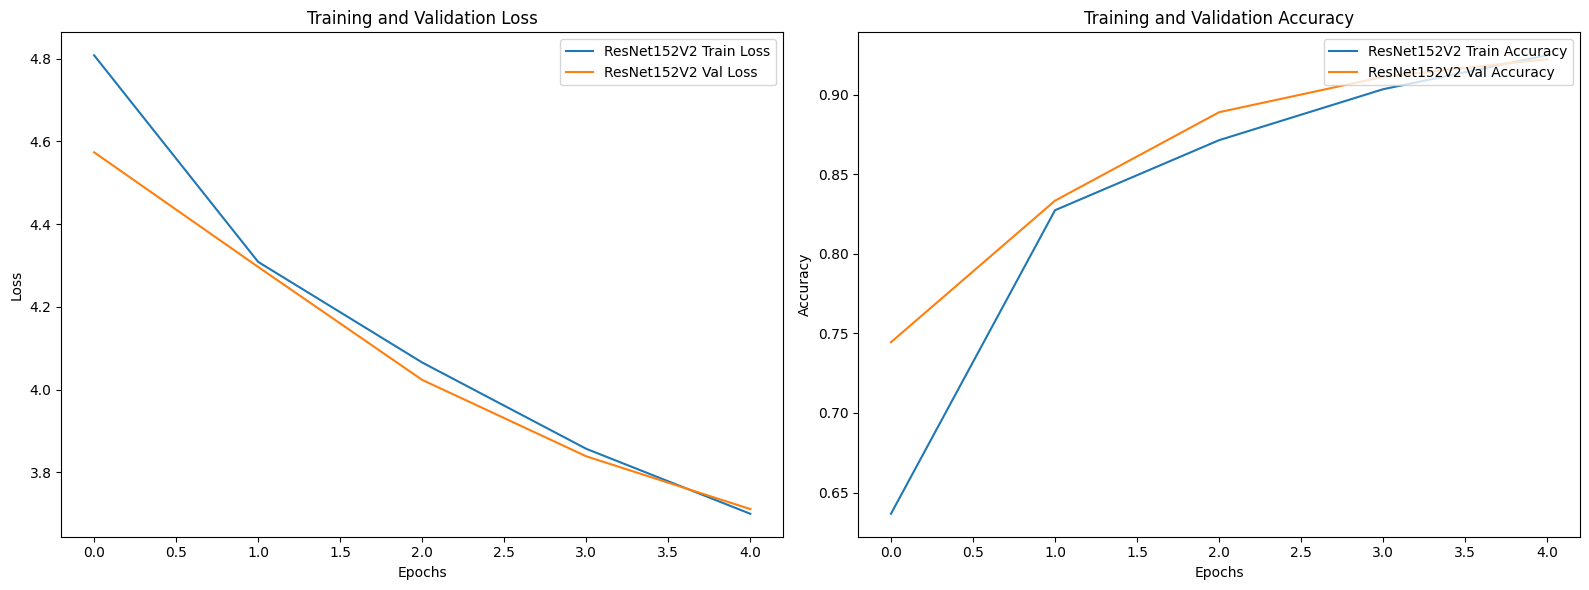

In [13]:
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...



Epoch 1/20


47/47 [==============================] - ETA: 0s - loss: 6.0638 - accuracy: 0.5653
Epoch 1: val_accuracy improved from -inf to 0.77778, saving model to model_1st_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 225s 4s/step - loss: 6.0638 - accuracy: 0.5653 - val_loss: 5.5430 - val_accuracy: 0.7778 - lr: 8.0000e-05
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 5.4108 - accuracy: 0.7627
Epoch 2: val_accuracy improved from 0.77778 to 0.85556, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 182s 4s/step - loss: 5.4108 - accuracy: 0.7627 - val_loss: 5.2556 - val_accuracy: 0.8556 - lr: 8.0000e-05
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 5.1208 - accuracy: 0.8073
Epoch 3: val_accuracy improved from 0.85556 to 0.86667, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 174s 4s/step - loss: 5.1208 - accuracy: 0.8073 - val_loss: 4.9912 - val_accuracy: 0.8667 - lr: 8.0000e-05
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss: 4.8845 - accuracy: 0.8487
Epoch 4: val_accuracy improved from 0.86667 to 0.87778, saving model to model_1st_che

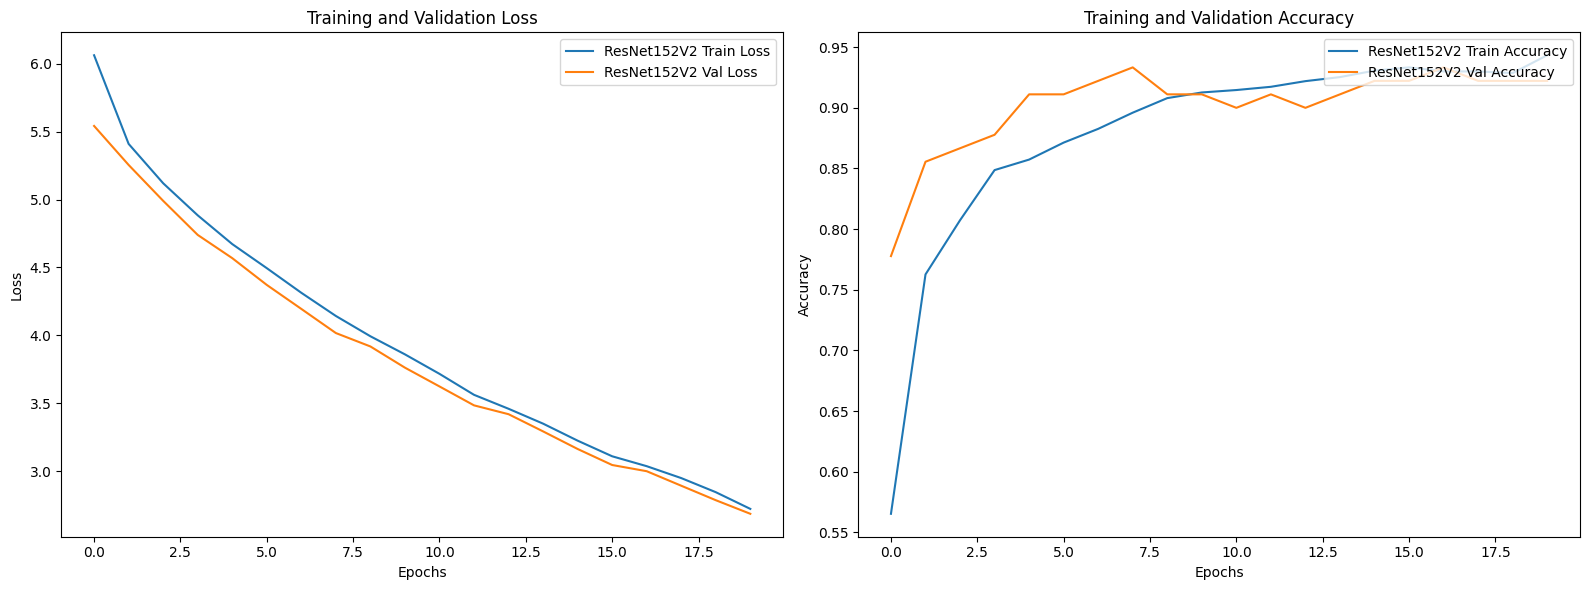

In [13]:
ResNet_1st_trainer.train_and_evaluate_all_models()

In [12]:
ResNet_2nd_trainer = ModelTrainer(
    models=ResNet_dict,
    class_labels=class_2nd_labels,
    train_data=(x_train_2nd, y_train_2nd),
    val_data=(x_test_2nd_shuffled, y_test_2nd_shuffled), 
    test_data=(x_test_2nd, y_test_2nd), 
    epochs=15,  
    batch_size=32, 
    checkpoint_path="model_2nd_checkpoint.h5"
)

Training ResNet152V2...



Epoch 1/10


47/47 [==============================] - ETA: 0s - loss: 5.1091 - accuracy: 0.7913
Epoch 1: val_accuracy improved from -inf to 0.92222, saving model to model_1st_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 192s 4s/step - loss: 5.1091 - accuracy: 0.7913 - val_loss: 3.8495 - val_accuracy: 0.9222 - lr: 0.0010
Epoch 2/10
47/47 [==============================] - ETA: 0s - loss: 3.3632 - accuracy: 0.8793
Epoch 2: val_accuracy did not improve from 0.92222
47/47 [==============================] - 174s 4s/step - loss: 3.3632 - accuracy: 0.8793 - val_loss: 2.8029 - val_accuracy: 0.9222 - lr: 8.0000e-04
Epoch 3/10
47/47 [==============================] - ETA: 0s - loss: 2.5042 - accuracy: 0.9093
Epoch 3: val_accuracy did not improve from 0.92222
47/47 [==============================] - 172s 4s/step - loss: 2.5042 - accuracy: 0.9093 - val_loss: 2.1869 - val_accuracy: 0.8889 - lr: 6.4000e-04
Epoch 4/10
47/47 [==============================] - ETA: 0s - loss: 1.9641 - accuracy: 0.9167
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00040959999896585943.

Epoch 4: val_accuracy did not improve from 0.92222
47/47 [==============================] - 171s 4s/s

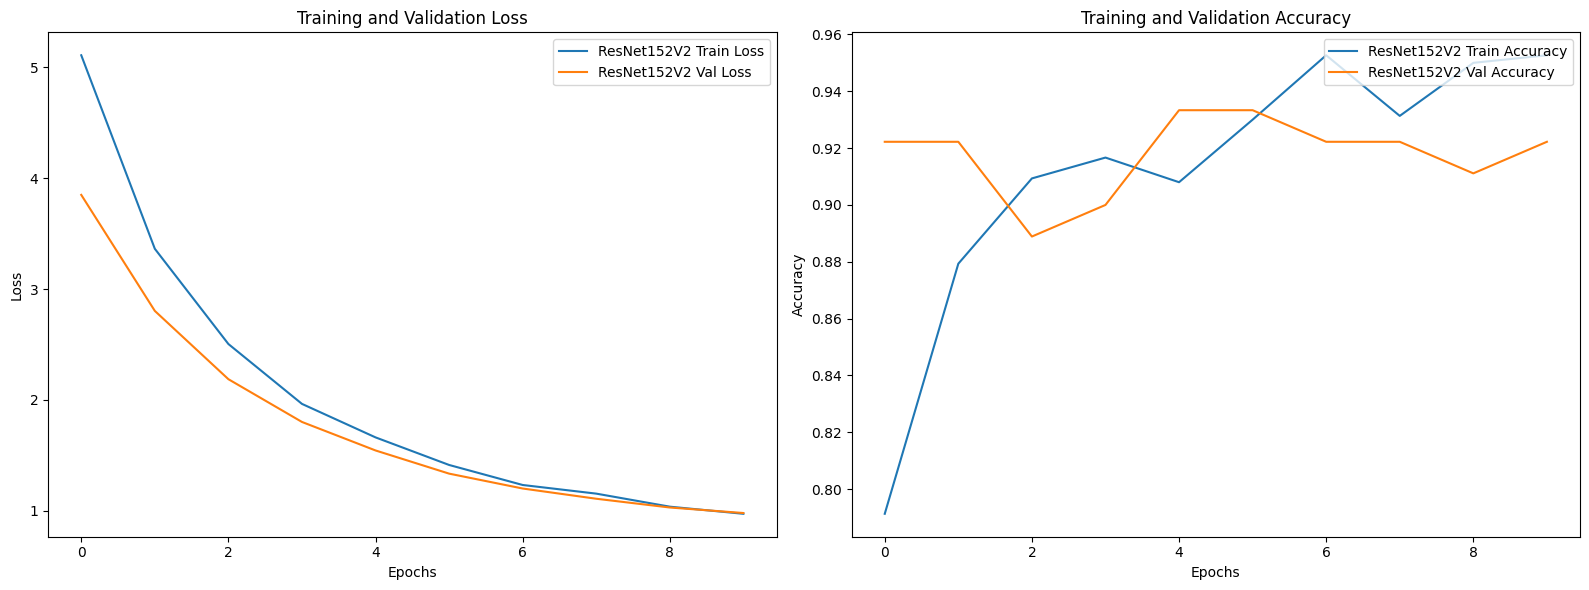

In [13]:
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...



Epoch 1/10


47/47 [==============================] - ETA: 0s - loss: 2.3775 - accuracy: 0.7633
Epoch 1: val_accuracy improved from -inf to 0.86667, saving model to model_1st_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 193s 4s/step - loss: 2.3775 - accuracy: 0.7633 - val_loss: 2.0273 - val_accuracy: 0.8667 - lr: 8.0000e-04
Epoch 2/10
47/47 [==============================] - ETA: 0s - loss: 1.8385 - accuracy: 0.8893
Epoch 2: val_accuracy improved from 0.86667 to 0.88889, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 171s 4s/step - loss: 1.8385 - accuracy: 0.8893 - val_loss: 1.7613 - val_accuracy: 0.8889 - lr: 6.0000e-04
Epoch 3/10
47/47 [==============================] - ETA: 0s - loss: 1.6260 - accuracy: 0.9147
Epoch 3: val_accuracy improved from 0.88889 to 0.91111, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 172s 4s/step - loss: 1.6260 - accuracy: 0.9147 - val_loss: 1.5819 - val_accuracy: 0.9111 - lr: 4.5000e-04
Epoch 4/10
47/47 [==============================] - ETA: 0s - loss: 1.4455 - accuracy: 0.9320
Epoch 4: val_accuracy improved from 0.91111 to 0.92222, saving model to model_1st_che

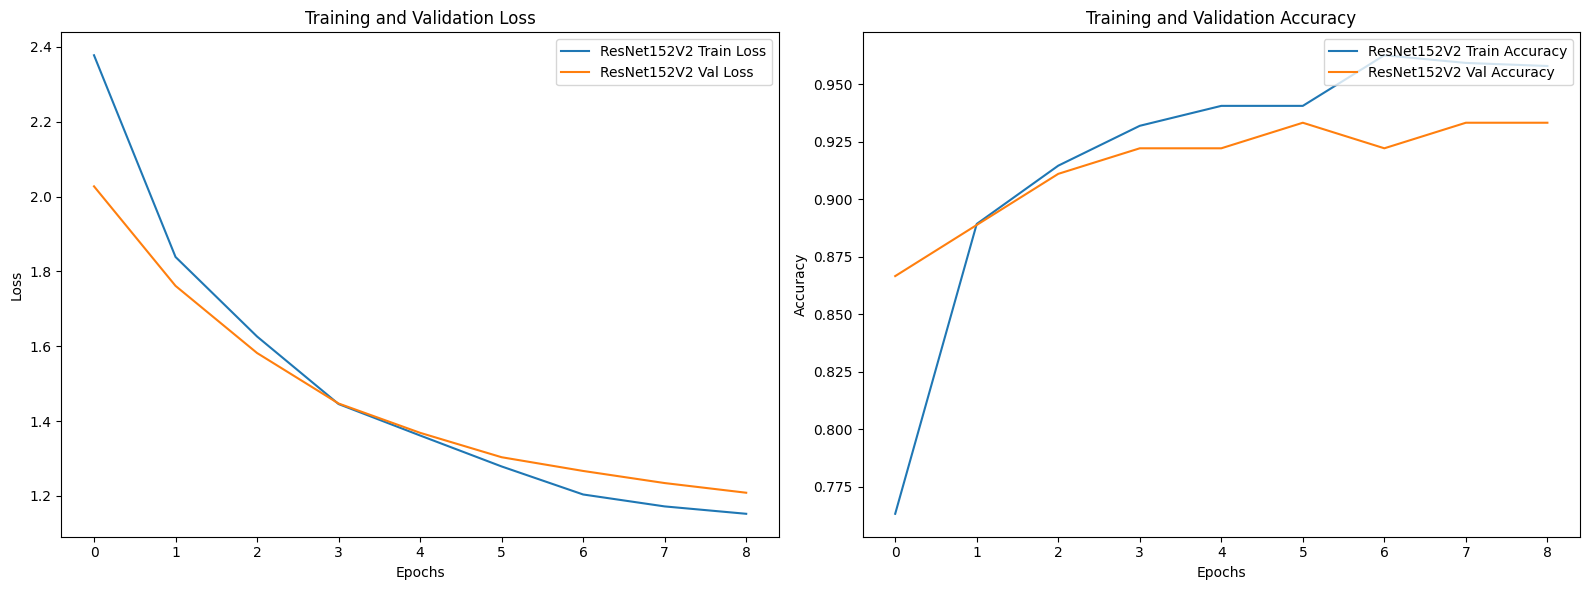

In [13]:
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...



Epoch 1/20


47/47 [==============================] - ETA: 0s - loss: 2.4407 - accuracy: 0.7133
Epoch 1: val_accuracy improved from -inf to 0.87778, saving model to model_1st_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 198s 4s/step - loss: 2.4407 - accuracy: 0.7133 - val_loss: 1.9382 - val_accuracy: 0.8778 - lr: 0.0010
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 1.8861 - accuracy: 0.8547
Epoch 2: val_accuracy improved from 0.87778 to 0.91111, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 183s 4s/step - loss: 1.8861 - accuracy: 0.8547 - val_loss: 1.6351 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 1.5757 - accuracy: 0.8987
Epoch 3: val_accuracy improved from 0.91111 to 0.94444, saving model to model_1st_checkpoint.h5
47/47 [==============================] - 183s 4s/step - loss: 1.5757 - accuracy: 0.8987 - val_loss: 1.4334 - val_accuracy: 0.9444 - lr: 7.0000e-04
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss: 1.4260 - accuracy: 0.8933
Epoch 4: val_accuracy did not improve from 0.94444
47/47 [==============================] - 1

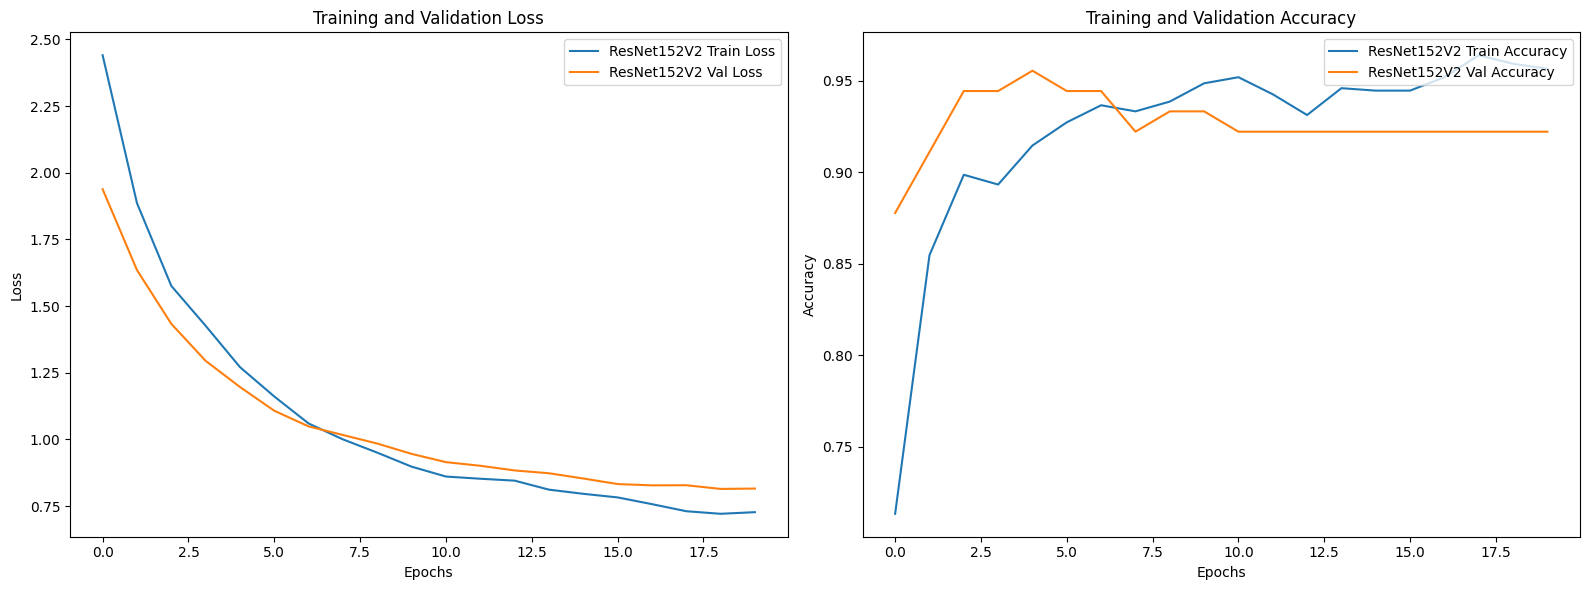

In [14]:
ResNet_1st_trainer.train_and_evaluate_all_models()

Training ResNet152V2...



Epoch 1/15


32/32 [==============================] - ETA: 0s - loss: 1.4428 - accuracy: 0.6480
Epoch 1: val_accuracy improved from -inf to 0.82000, saving model to model_2nd_checkpoint.h5


c:\ProgramData\anaconda3\envs\corrosion\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 134s 4s/step - loss: 1.4428 - accuracy: 0.6480 - val_loss: 1.1789 - val_accuracy: 0.8200 - lr: 8.0000e-04
Epoch 2/15
32/32 [==============================] - ETA: 0s - loss: 1.1379 - accuracy: 0.8280
Epoch 2: val_accuracy improved from 0.82000 to 0.88000, saving model to model_2nd_checkpoint.h5
32/32 [==============================] - 116s 4s/step - loss: 1.1379 - accuracy: 0.8280 - val_loss: 1.0348 - val_accuracy: 0.8800 - lr: 8.0000e-04
Epoch 3/15
32/32 [==============================] - ETA: 0s - loss: 1.0101 - accuracy: 0.8910
Epoch 3: val_accuracy did not improve from 0.88000
32/32 [==============================] - 114s 4s/step - loss: 1.0101 - accuracy: 0.8910 - val_loss: 1.0322 - val_accuracy: 0.8800 - lr: 5.6000e-04
Epoch 4/15
32/32 [==============================] - ETA: 0s - loss: 0.9942 - accuracy: 0.8760
Epoch 4: val_accuracy improved from 0.88000 to 0.92000, saving model to model_2nd_checkpoint.h5
32/32 [===========================

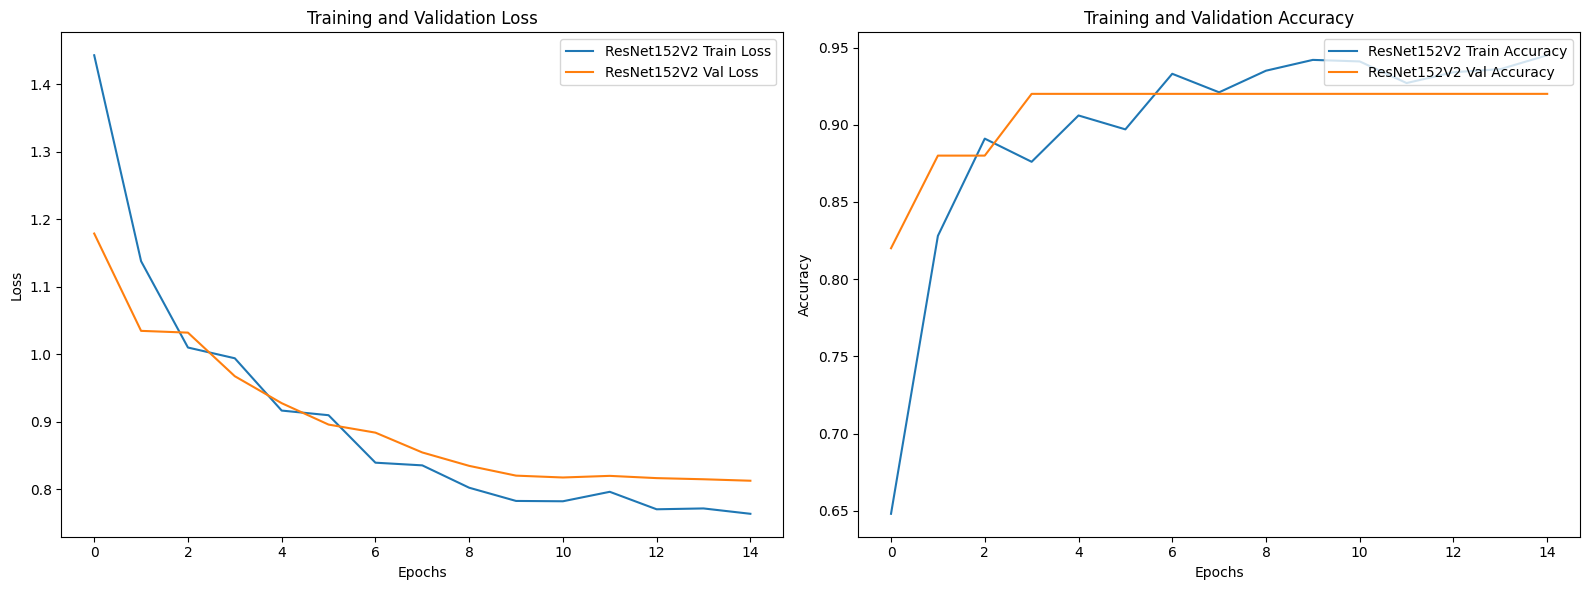

In [13]:
ResNet_2nd_trainer.train_and_evaluate_all_models()